In [ ]:
Simulador dimod 25/02 (simulando Dwave)

In [1]:
import dimod
print(dimod.__version__)


0.12.18


In [4]:
import dimod
import pandas as pd 
import numpy as np   
import time

# Definir el grafo
edges = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (0, 3): 1}

# Crear el modelo QUBO
Q = {}
for (u, v), weight in edges.items():
    Q[(u, u)] = Q.get((u, u), 0) - weight
    Q[(v, v)] = Q.get((v, v), 0) - weight
    Q[(u, v)] = Q.get((u, v), 0) + 2 * weight

# Crear el sampler
sampler = dimod.SimulatedAnnealingSampler()

# Medir tiempo de ejecución del sampler
num_reads = 1024
tic = time.time()
sampleset = sampler.sample_qubo(Q, num_reads=num_reads)
toc = time.time()

# Calcular tiempo por muestra (en milisegundos)
total_time = toc - tic  # en segundos
t_sample = (total_time / num_reads) * 1000  # en ms

# Mostrar mejor solución
best_solution = sampleset.first.sample
print("Mejor resultado:", best_solution)

# Definir soluciones óptimas
opt_states = [{0: 0, 1: 1, 2: 0, 3: 1}, {0: 1, 1: 0, 2: 1, 3: 0}]
opt_value = 4

# Función para calcular P_GS y TTS
def calculate_P_GS_and_TTS(sampleset, opt_states, t_sample):
    # Formatear los estados óptimos como arrays
    opt_states_formatted = [
        np.array([state[i] for i in range(len(state))]) for state in opt_states
    ]

    # Contar éxitos
    success_counts = 0
    for sample in sampleset.record:
        sample_state = sample[0]
        if any(np.array_equal(sample_state, opt_state) for opt_state in opt_states_formatted):
            success_counts += sample[2]

    # Número total de muestras
    num_reads = sum(sampleset.record.num_occurrences)
    p_gs = success_counts / num_reads

    # Calcular TTS con enfoque robusto
    if p_gs == 0:
        tts = float("inf")
    else:
        raw_tts = np.abs(np.log(0.01) / np.log(1 - p_gs))
        tts = t_sample * max(1, raw_tts)

    return p_gs, tts

# Calcular métricas
p_gs, tts = calculate_P_GS_and_TTS(sampleset, opt_states, t_sample)
print(f"Tiempo total: {total_time:.4f}s → {t_sample:.4f}ms por muestra")
print("P_GS:", p_gs)
print("TTS:", tts, "ms")

# Mostrar en DataFrame
data = {
    "Instance": ["(4, 4, 0)"],
    "Opt": [opt_value],
    "P_GS": [p_gs],
    "t_sample (ms)": [t_sample],
    "TTS (ms)": [tts]
}
df = pd.DataFrame(data)
display(df)


Mejor resultado: {0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(0)}
Tiempo total: 13.4855s → 13.1695ms por muestra
P_GS: 0.6943359375
TTS: 51.16782348140028 ms


,Instance,Opt,P_GS,t_sample (ms),TTS (ms)
0,"(4, 4, 0)",4,0.694336,13.169462,51.167823


In [5]:
best_solution = sampleset.first.sample
print("Mejor resultado: ",best_solution)

Mejor resultado:  {0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(0)}


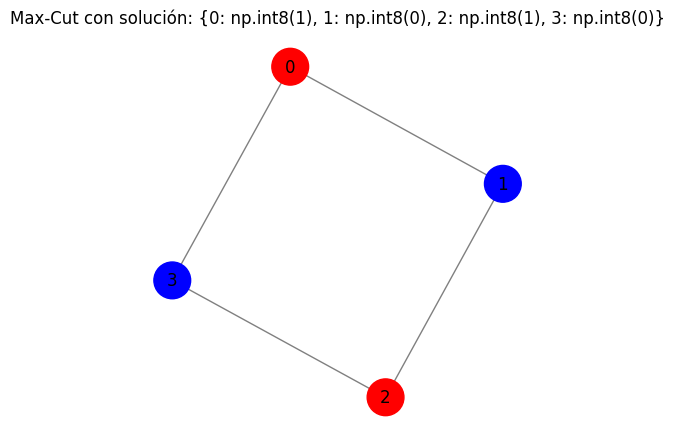

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
# Convertir la mejor solución a colores para los nodos
node_colors = ['red' if best_solution[node] == 1 else 'blue' for node in best_solution]

# Crear el grafo
G = nx.Graph()
G.add_edges_from(edges)

# Dibujar el grafo con los colores correspondientes a la mejor solución
plt.figure(figsize=(4,4))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=700)
plt.title(f"Max-Cut con solución: {best_solution}")
plt.show()


In [7]:
print("Resultados:")
print(sampleset)

Resultados:
      0  1  2  3 energy num_oc.
1     0  1  0  1   -4.0       1
2     1  0  1  0   -4.0       1
4     0  1  0  1   -4.0       1
5     0  1  0  1   -4.0       1
6     0  1  0  1   -4.0       1
7     0  1  0  1   -4.0       1
8     1  0  1  0   -4.0       1
10    1  0  1  0   -4.0       1
11    0  1  0  1   -4.0       1
12    1  0  1  0   -4.0       1
13    1  0  1  0   -4.0       1
15    0  1  0  1   -4.0       1
16    0  1  0  1   -4.0       1
17    1  0  1  0   -4.0       1
18    1  0  1  0   -4.0       1
19    0  1  0  1   -4.0       1
20    0  1  0  1   -4.0       1
21    0  1  0  1   -4.0       1
23    1  0  1  0   -4.0       1
24    0  1  0  1   -4.0       1
27    0  1  0  1   -4.0       1
29    1  0  1  0   -4.0       1
30    1  0  1  0   -4.0       1
32    0  1  0  1   -4.0       1
34    0  1  0  1   -4.0       1
36    0  1  0  1   -4.0       1
37    1  0  1  0   -4.0       1
39    0  1  0  1   -4.0       1
41    0  1  0  1   -4.0       1
42    0  1  0  1   -4.0     

In [8]:
from itertools import product 
from tabulate import tabulate
# Obtener la mejor solución
best_solution = sampleset.first.sample
print("Mejor resultado:", best_solution)

# Generar todas las combinaciones posibles de 4 bits
all_combinations = list(product([0, 1], repeat=4))  # Todas las combinaciones de 4 bits

# Crear un diccionario para contar las ocurrencias de cada combinación
count_dict = {combination: 0 for combination in all_combinations}

# Contar las ocurrencias de cada combinación en los resultados
for sample in sampleset.record:
    sample_state = tuple(sample[0]) 
    count_dict[sample_state] += sample[2] 

# Crear una tabla con todas las combinaciones y sus conteos
table_data = []
for combination, count in count_dict.items():
    table_data.append([combination, count])

# Encabezados de la tabla
headers = ["Combinación", "Conteo"]

# Imprimir la tabla
print("\nConteo de todas las combinaciones:")
print(tabulate(table_data, headers=headers, tablefmt="pretty"))

Mejor resultado: {0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(0)}

Conteo de todas las combinaciones:
+--------------+--------+
| Combinación  | Conteo |
+--------------+--------+
| (0, 0, 0, 0) |   0    |
| (0, 0, 0, 1) |   5    |
| (0, 0, 1, 0) |   10   |
| (0, 0, 1, 1) |   64   |
| (0, 1, 0, 0) |   8    |
| (0, 1, 0, 1) |  367   |
| (0, 1, 1, 0) |   55   |
| (0, 1, 1, 1) |   7    |
| (1, 0, 0, 0) |   3    |
| (1, 0, 0, 1) |   79   |
| (1, 0, 1, 0) |  344   |
| (1, 0, 1, 1) |   7    |
| (1, 1, 0, 0) |   60   |
| (1, 1, 0, 1) |   6    |
| (1, 1, 1, 0) |   9    |
| (1, 1, 1, 1) |   0    |
+--------------+--------+


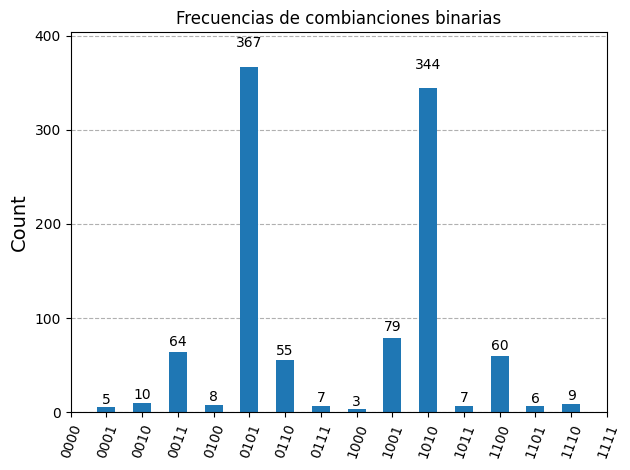

In [16]:
from qiskit.visualization import plot_histogram

# Mantener el orden de bits tal como está en tu conteo
counts_qiskit_format = {
    ''.join(map(str, combo)): count for combo, count in table_data
}

# Mostrar histograma al estilo Qiskit, con azul oscuro por defecto
plot_histogram(counts_qiskit_format, title="Frecuencias de combianciones binarias")
